### Download pyspark module

In [ ]:
# !pip3 install pyspark

### Create spark session object

In [1]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

conf = SparkConf()\
    .setMaster("local[*]")\
    .setAppName("Working with DF")\
    .setExecutorEnv("spark.driver.memory","2g")\
    .setExecutorEnv("spark.executor.memory","4g")

spark = SparkSession\
    .builder\
    .config(conf=conf)\
    .getOrCreate()
spark

### Download data from kaggle (only in COLAB)

In [4]:
! pip install -q kaggle
from google.colab import files
files.upload()

In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle dataset list

usage: kaggle
       [-h]
       [-v]
       {competitions,c,datasets,d,kernels,k,config}
       ...
kaggle: error: argument command: invalid choice: 'dataset' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'config')


In [ ]:
! kaggle datasets download -d 'thec03u5/fifa-18-demo-player-dataset'

  0% 0.00/3.82M [00:00<?, ?B/s]
100% 3.82M/3.82M [00:00<00:00, 193MB/s]


In [ ]:
! unzip fifa-18-demo-player-dataset.zip

Archive:  fifa-18-demo-player-dataset.zip
  inflating: CompleteDataset.csv     
  inflating: PlayerAttributeData.csv  
  inflating: PlayerPersonalData.csv  
  inflating: PlayerPlayingPositionData.csv  


## Part 1: Create DF and Basic Operations

In [6]:
df1 = spark\
    .read\
    .format('csv')\
    .load('CompleteDataset.csv',
        inferschema=True,
        header=True)

In [7]:
# show data
df1.show(10)

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

In [ ]:
# how many partitions in the df1
df1.rdd.getNumPartitions()

2

In [ ]:
# increase the partitions in df
df2 = df1.repartition(4)
df2.rdd.getNumPartitions()

4

In [ ]:
# decrease the partitions in df
df3 = df2.coalesce(3)
df3.rdd.getNumPartitions()

3

In [ ]:
# rename columns and deal with null values
df2 = df2.withColumnRenamed('_c0','ID')\
    .withColumnRenamed('Ball control', 'Ball_Control')\
    .withColumnRenamed('Sliding tackle', 'Sliding_Tackle')

df2.na.fill(
    {
        'RAM': 10,
        'RB': 1
    }
).show(5)

+-----+------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+-----+----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|   ID|        Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo|Value|Wage|Special|Acceleration|Aggression|Agility|Balance|Ball_Control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|GK kicking

In [ ]:
df2.select('Name','Overall').show(5)

+------------+-------+
|        Name|Overall|
+------------+-------+
|   T. Hołota|     65|
|    J. Salas|     67|
|Park Han Bin|     64|
| R. Murawski|     70|
|   M. Appiah|     66|
+------------+-------+
only showing top 5 rows



In [ ]:
df2.filter(df2['Overall']>70).show(5)

+----+-----------+---+--------------------+-----------+--------------------+-------+---------+-------------+--------------------+-----+----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|  ID|       Name|Age|               Photo|Nationality|                Flag|Overall|Potential|         Club|           Club Logo|Value|Wage|Special|Acceleration|Aggression|Agility|Balance|Ball_Control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|GK kicking|GK positioning|

In [ ]:
df2.select('Overall','Name','Age').where(df2['Overall']>70).show()

+-------+------------------+---+
|Overall|              Name|Age|
+-------+------------------+---+
|     81|      R. Guerreiro| 23|
|     72|         A. Benali| 25|
|     87|          A. Vidal| 30|
|     71|     Marlion Rolim| 25|
|     71|         I. Hayden| 22|
|     71|      P. Rodríguez| 27|
|     73|        T. Carroll| 25|
|     76|        G. Mercado| 30|
|     83|         K. Walker| 27|
|     71|            Martos| 33|
|     71|    Martin Cordeia| 33|
|     73|              Tito| 31|
|     71|K. Vandendriessche| 27|
|     78|           Muniain| 24|
|     75|    Allan Bardinho| 25|
|     72|   A. Martín Arias| 24|
|     71|       M. Albornoz| 26|
|     71|       V. Fayzulin| 31|
|     74|          C. Obasi| 31|
|     74|      G. Karadeniz| 37|
+-------+------------------+---+
only showing top 20 rows



In [ ]:
df2.filter(df2['Overall']>80).groupby('Age').count().sort('Age').show()

+---+-----+
|Age|count|
+---+-----+
| 18|    2|
| 20|    3|
| 21|   11|
| 22|   16|
| 23|   23|
| 24|   27|
| 25|   34|
| 26|   39|
| 27|   39|
| 28|   43|
| 29|   35|
| 30|   39|
| 31|   26|
| 32|   21|
| 33|   15|
| 34|    8|
| 35|    6|
| 36|    4|
| 39|    1|
+---+-----+



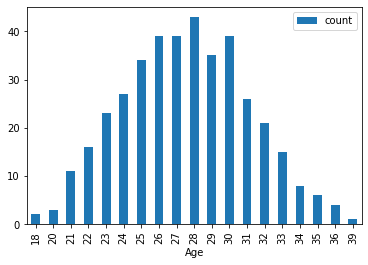

In [ ]:
df2_result = df2.filter(df2['Overall']>80).groupby('Age').count().sort('Age')
pandas_df = df2_result.toPandas()
pandas_df.plot(x='Age', y='count', kind='bar')


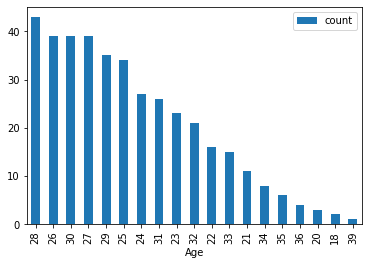

In [ ]:
pandas_df.sort_values(by='count',ascending=False)\
    .plot(x='Age', y='count', kind='bar')


## Part 2: Advanced DF Operations: Spark SQL and UDF

In [ ]:
df2.createOrReplaceTempView('d_football')

In [ ]:
query = '''
        SELECT 
            Age, 
             count(*) as count
        FROM d_football
        WHERE Overall > 70
        GROUP BY Age
        ORDER BY Age
'''

res = spark.sql(query)
res.show()

+---+-----+
|Age|count|
+---+-----+
| 17|    1|
| 18|   13|
| 19|   41|
| 20|  105|
| 21|  160|
| 22|  246|
| 23|  296|
| 24|  369|
| 25|  486|
| 26|  418|
| 27|  444|
| 28|  395|
| 29|  474|
| 30|  359|
| 31|  272|
| 32|  206|
| 33|  283|
| 34|  101|
| 35|   74|
| 36|   57|
+---+-----+
only showing top 20 rows



### UDF

In [ ]:
def uppercase_converter(record):
    if record is not None:
        if len(record) > 10:
            return record.upper()
        else:
            return record.lower()

# register the df
df2.createOrReplaceTempView('d_football_2')

# register the function
spark.udf.register('UPPER_SHIXI', uppercase_converter)

# use the udf in SQL
query2 = '''
select Age, 
UPPER_SHIXI(Name) as Name,
UPPER_SHIXI(Club) as Club
from d_football_2
'''

res2 = spark.sql(query2)
res2.show()

+---+-----------------+--------------------+
|Age|             Name|                Club|
+---+-----------------+--------------------+
| 26|         v. moren|    WAASLAND-BEVEREN|
| 33|        c. agoste|UNIVERSIDAD CATÓLICA|
| 19|    STEVEN PRIETO|         REAL OVIEDO|
| 21|        c. alemán|ESTUDIANTES DE LA...|
| 27|       p. wiegers|   SG DYNAMO DRESDEN|
| 26|     H. YAMAGUCHI|        CEREZO OSAKA|
| 29|    D. MCGOLDRICK|        IPSWICH TOWN|
| 24|       r. teibert|VANCOUVER WHITECA...|
| 20|          i. radu|            avellino|
| 28|   P. ABRAHAMSSON|           bk häcken|
| 21|       c. burgess|   SCUNTHORPE UNITED|
| 31|            galán|      RAYO VALLECANO|
| 25|       r. andrero|      AUDAX ITALIANO|
| 31|         m. topal|       FENERBAHÇE SK|
| 23|        l. moneta|      LEGIA WARSZAWA|
| 21|        t. szántó|       SK RAPID WIEN|
| 23|          y. njie|         BOAVISTA FC|
| 20|     AARÓN MARTÍN|        RCD ESPANYOL|
| 23|K. FRIESENBICHLER|     FK AUSTRIA WIEN|
| 20|     